# import neccessary libraries and find duplicated rows
duplicated transactions are called transactions within one minute, with the same amount of money and from the same country

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime

df1= pd.read_excel('PSP_Jan_Feb_2019.xlsx')
drop_list=[]

for i in range(len(df1)-1):
    if df1.loc[i,'country']==df1.loc[i+1,'country'] and df1.loc[i,'amount']==df1.loc[i+1,'amount']:
        dt1 = df1.loc[i,'tmsp']
        dt2 = df1.loc[i+1,'tmsp']
        delta=dt2-dt1
        if delta.seconds<=60:
            drop_list.append(i)  

In [5]:
#dropping duplicated rows to see how many rows remained
raw_dataset = df1.drop(df1.index[drop_list])
raw_dataset=raw_dataset.reset_index()
raw_dataset.shape[0]

27337

In [6]:
#deleting unnecessary column with the name:'Unnamed: 0'
raw_dataset = raw_dataset.drop('Unnamed: 0', axis=1)
raw_dataset.head(10)

,index,tmsp,country,amount,success,PSP,3D_secured,card
0,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
1,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
2,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners
3,6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master
4,7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master
5,9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa
6,14,2019-01-01 00:14:35,Austria,232,1,UK_Card,1,Diners
7,15,2019-01-01 00:15:45,Germany,268,0,Simplecard,0,Master
8,18,2019-01-01 00:18:37,Switzerland,89,0,Moneycard,0,Master
9,21,2019-01-01 00:21:11,Germany,205,1,Moneycard,0,Master


In [7]:
#digitizing the country column into 3 columns which names are: Is_Germany,Is_Austia,Is_Switzerland
prepros_dataset=pd.DataFrame()
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,2]=='Germany':
        prepros_dataset.loc[i,'Is_Germany']=1
        prepros_dataset.loc[i,'Is_Austria']=0
        prepros_dataset.loc[i,'Is_Switzerland']=0
    elif raw_dataset.iloc[i,2]=='Austria':
        prepros_dataset.loc[i,'Is_Germany']=0
        prepros_dataset.loc[i,'Is_Austria']=1
        prepros_dataset.loc[i,'Is_Switzerland']=0
    elif raw_dataset.iloc[i,2]=='Switzerland':
        prepros_dataset.loc[i,'Is_Germany']=0
        prepros_dataset.loc[i,'Is_Austria']=0
        prepros_dataset.loc[i,'Is_Switzerland']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [8]:
#digitizing the card column into these 3 new columns:Is_Visa,Is_Diners,Is_Master
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,7]=='Visa':
        prepros_dataset.loc[i,'Is_Visa']=1
        prepros_dataset.loc[i,'Is_Diners']=0
        prepros_dataset.loc[i,'Is_Master']=0
    elif raw_dataset.iloc[i,7]=='Diners':
        prepros_dataset.loc[i,'Is_Visa']=0
        prepros_dataset.loc[i,'Is_Diners']=1
        prepros_dataset.loc[i,'Is_Master']=0
    elif raw_dataset.iloc[i,7]=='Master':
        prepros_dataset.loc[i,'Is_Visa']=0
        prepros_dataset.loc[i,'Is_Diners']=0
        prepros_dataset.loc[i,'Is_Master']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master
0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0


In [9]:
#describing the amount column to see it's mean and std
raw_dataset['amount'].describe(percentiles=[.05,.95])

count    27337.000000
mean       201.878370
std         96.144551
min          6.000000
5%          43.000000
50%        200.000000
95%        366.000000
max        630.000000
Name: amount, dtype: float64

In [10]:
#categorizing the amount column into these three categories:amount0,amount1,amount2
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,3]<100:
        prepros_dataset.loc[i,'amount0']=1
        prepros_dataset.loc[i,'amount1']=0
        prepros_dataset.loc[i,'amount2']=0
    elif 100<= raw_dataset.iloc[i,3] <=300:
        prepros_dataset.loc[i,'amount0']=0
        prepros_dataset.loc[i,'amount1']=1
        prepros_dataset.loc[i,'amount2']=0
    elif raw_dataset.iloc[i,3] >300:
        prepros_dataset.loc[i,'amount0']=0
        prepros_dataset.loc[i,'amount1']=0
        prepros_dataset.loc[i,'amount2']=1
        
prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [11]:
#extracting the day of transaction and determining it's day of week and digitizing the day into 7 days of week
for i in range(len(raw_dataset)):
    weekday=datetime.weekday(raw_dataset.at[i,'tmsp'])
    if  weekday==0:
        prepros_dataset.loc[i,'Monday']=1
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==1:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=1
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==2:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=1
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==3:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=1
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==4:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=1
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==5:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=1
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==6:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#extracting the hour of transactions and dividing 24 hours of a day into 24 groups which begins from hour0 to hour23
for i in range(len(raw_dataset)):
    hour=raw_dataset.iloc[i]['tmsp'].hour
    for j in range (24):
        if j==hour:
            prepros_dataset.loc[i,'hour'+ str(j)]=1
        else:
            prepros_dataset.loc[i,'hour'+ str(j)]=0
            
prepros_dataset.tail(10)

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Monday,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
27327,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27328,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27329,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27330,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27331,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27332,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27334,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27335,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27336,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
#transfering the 3D_secured column into secured column in the new dataset
for i in range(len(raw_dataset)):
    prepros_dataset.loc[i,'secured']=raw_dataset.loc[i,'3D_secured']
prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Monday,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,secured
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#in this block of code, I define 4 columns as my model targets which is column belongs to one of the PSPs.
# if a transaction is successful on any of PSPs, I put 1 in the corresponding  PSP column and put 0 into three others.
#if a transaction is failed, I put 0 in all these four columns
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,5]=='UK_Card' and raw_dataset.iloc[i,4]==1 :
        prepros_dataset.loc[i,'UK_Card_success']=1
        prepros_dataset.loc[i,'Simplecard_success']=0
        prepros_dataset.loc[i,'Moneycard_success']=0
        prepros_dataset.loc[i,'Goldcard_success']=0
    
    elif raw_dataset.iloc[i,5]=='Simplecard' and raw_dataset.iloc[i,4]==1 :
        prepros_dataset.loc[i,'UK_Card_success']=0
        prepros_dataset.loc[i,'Simplecard_success']=1
        prepros_dataset.loc[i,'Moneycard_success']=0
        prepros_dataset.loc[i,'Goldcard_success']=0
   
    elif raw_dataset.iloc[i,5]=='Moneycard' and raw_dataset.iloc[i,4]==1 :
        prepros_dataset.loc[i,'UK_Card_success']=0
        prepros_dataset.loc[i,'Simplecard_success']=0
        prepros_dataset.loc[i,'Moneycard_success']=1
        prepros_dataset.loc[i,'Goldcard_success']=0
    
    elif raw_dataset.iloc[i,5]=='Goldcard' and raw_dataset.iloc[i,4]==1 :
        prepros_dataset.loc[i,'UK_Card_success']=0
        prepros_dataset.loc[i,'Simplecard_success']=0
        prepros_dataset.loc[i,'Moneycard_success']=0
        prepros_dataset.loc[i,'Goldcard_success']=1
        
    elif raw_dataset.iloc[i,4]==0 :
        prepros_dataset.loc[i,'UK_Card_success']=0
        prepros_dataset.loc[i,'Simplecard_success']=0
        prepros_dataset.loc[i,'Moneycard_success']=0
        prepros_dataset.loc[i,'Goldcard_success']=0

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Monday,...,hour19,hour20,hour21,hour22,hour23,secured,UK_Card_success,Simplecard_success,Moneycard_success,Goldcard_success
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
#add another column to the last of our dataset to separate successful and failed transactions from each other
# if a transaction failed,I put 1 in the failed column to determine this transaction failed
# if a transaction successed, I put zero in in the failed column
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,4]==0 :
        prepros_dataset.loc[i,'Failed']=1
    else:
        prepros_dataset.loc[i,'Failed']=0
    
prepros_dataset.head()        

,Is_Germany,Is_Austria,Is_Switzerland,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Monday,...,hour20,hour21,hour22,hour23,secured,UK_Card_success,Simplecard_success,Moneycard_success,Goldcard_success,Failed
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
#save the final processed data into a CSV file
prepros_dataset.to_csv('preprocessed')

<BarContainer object of 4 artists>

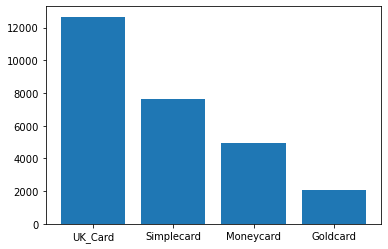

In [17]:
#visualizing the data
import matplotlib.pyplot as plt
names=['UK_Card','Simplecard','Moneycard','Goldcard']
values=[(raw_dataset.PSP=='UK_Card').sum(),(raw_dataset.PSP=='Simplecard').sum(),(raw_dataset.PSP=='Moneycard').sum()
        ,(raw_dataset.PSP=='Goldcard').sum()]
plt.bar(names,values)

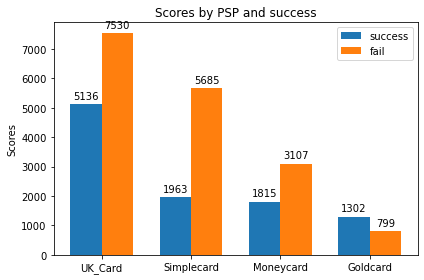

In [18]:
#visualizing the data
[su,ss,sm,sg]=[0,0,0,0]
[fu,fs,fm,fg]=[0,0,0,0]
for i in range(len(raw_dataset)):
    if raw_dataset.iloc[i,5]=='UK_Card':
        if raw_dataset.iloc[i,4]==1:
            su +=1
        else:
            fu +=1
    elif raw_dataset.iloc[i,5]=='Simplecard':
        if raw_dataset.iloc[i,4]==1:
            ss +=1
        else:
            fs +=1
    elif raw_dataset.iloc[i,5]=='Moneycard':
        if raw_dataset.iloc[i,4]==1:
            sm +=1
        else:
            fm +=1
    elif raw_dataset.iloc[i,5]=='Goldcard':
        if raw_dataset.iloc[i,4]==1:
            sg +=1
        else:
            fg +=1
        
labels = ['UK_Card', 'Simplecard', 'Moneycard', 'Goldcard']
successful = [su,ss,sm,sg]
failed = [fu,fs,fm,fg]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, successful, width, label='success')
rects2 = ax.bar(x + width/2, failed, width, label='fail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by PSP and success')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [19]:
#import necessary libraries to design the model
#!pip install tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
#reading the processed data
dataframe= pd.read_csv('preprocessed')
dataframe.shape

(27337, 47)

In [21]:
#splitting the dataframe into two groups:80% for training and 20% for testing
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 21870 samples for training and 5467 for validation


In [22]:
#defining target columns for the model which are the last five columns:UK_Card_success,Simplecard_success,
#Moneycard_success,Goldcard_success and failed
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe[dataframe.columns[-5:]]
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe[dataframe.columns[:-5]]), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [23]:
#showing Input and Target columns
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'Unnamed: 0': <tf.Tensor: shape=(), dtype=int64, numpy=4375>, 'Is_Germany': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'Is_Austria': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Is_Switzerland': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Is_Visa': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Is_Diners': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'Is_Master': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'amount0': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'amount1': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'amount2': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Monday': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Tuesday': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Wednesday': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'Thursday': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Friday': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Saturday': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'Sunday': <

In [24]:
# batching the dataset
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [25]:
# Numerical features
Is_Germany=keras.Input(shape=(1,),name="Is_Germany")
Is_Austria=keras.Input(shape=(1,),name="Is_Austria")
Is_Switzerland=keras.Input(shape=(1,),name="Is_Switzerland")
Is_Visa=keras.Input(shape=(1,),name="Is_Visa")
Is_Diners=keras.Input(shape=(1,),name="Is_Diners")
Is_Master=keras.Input(shape=(1,),name="Is_Master")
amount0=keras.Input(shape=(1,),name="amount0")
amount1=keras.Input(shape=(1,),name="amount1")
amount2=keras.Input(shape=(1,),name="amount2")
Monday=keras.Input(shape=(1,),name="Monday")
Tuesday=keras.Input(shape=(1,),name="Tuesday")
Wednesday=keras.Input(shape=(1,),name="Wednesday")
Thursday=keras.Input(shape=(1,),name="Thursday")
Friday=keras.Input(shape=(1,),name="Friday")
Saturday=keras.Input(shape=(1,),name="Saturday")
Sunday=keras.Input(shape=(1,),name="Sunday")
hour0=keras.Input(shape=(1,),name="hour0")
hour1=keras.Input(shape=(1,),name="hour1")
hour2=keras.Input(shape=(1,),name="hour2")
hour3=keras.Input(shape=(1,),name="hour3")
hour4=keras.Input(shape=(1,),name="hour4")
hour5=keras.Input(shape=(1,),name="hour5")
hour6=keras.Input(shape=(1,),name="hour6")
hour7=keras.Input(shape=(1,),name="hour7")
hour8=keras.Input(shape=(1,),name="hour8")
hour9=keras.Input(shape=(1,),name="hour9")
hour10=keras.Input(shape=(1,),name="hour10")
hour11=keras.Input(shape=(1,),name="hour11")
hour12=keras.Input(shape=(1,),name="hour12")
hour13=keras.Input(shape=(1,),name="hour13")
hour14=keras.Input(shape=(1,),name="hour14")
hour15=keras.Input(shape=(1,),name="hour15")
hour16=keras.Input(shape=(1,),name="hour16")
hour17=keras.Input(shape=(1,),name="hour17")
hour18=keras.Input(shape=(1,),name="hour18")
hour19=keras.Input(shape=(1,),name="hour19")
hour20=keras.Input(shape=(1,),name="hour20")
hour21=keras.Input(shape=(1,),name="hour21")
hour22=keras.Input(shape=(1,),name="hour22")
hour23=keras.Input(shape=(1,),name="hour23")
secured=keras.Input(shape=(1,),name="secured")


all_inputs = [
    Is_Germany,
    Is_Austria,
    Is_Switzerland,
    Is_Visa,
    Is_Diners,
    Is_Master,
    amount0,
    amount1,
    amount2,
    Monday,
    Tuesday,
    Wednesday,
    Thursday,
    Friday,
    Saturday,
    Sunday,
    hour0,
    hour1,
    hour2,
    hour3,
    hour4,
    hour5,
    hour6,
    hour7,
    hour8,
    hour9,
    hour10,
    hour11,
    hour12,
    hour13,
    hour14,
    hour15,
    hour16,
    hour17,
    hour18,
    hour19,
    hour20,
    hour21,
    hour22,
    hour23,
    secured,
]


all_features = layers.concatenate(
    [
    Is_Germany,
    Is_Austria,
    Is_Switzerland,
    Is_Visa,
    Is_Diners,
    Is_Master,
    amount0,
    amount1,
    amount2,
    Monday,
    Tuesday,
    Wednesday,
    Thursday,
    Friday,
    Saturday,
    Sunday,
    hour0,
    hour1,
    hour2,
    hour3,
    hour4,
    hour5,
    hour6,
    hour7,
    hour8,
    hour9,
    hour10,
    hour11,
    hour12,
    hour13,
    hour14,
    hour15,
    hour16,
    hour17,
    hour18,
    hour19,
    hour20,
    hour21,
    hour22,
    hour23,
    secured,

    ]
)

#designing the model
x = layers.Dense(1024, activation="relu")(all_features)
x = layers.Dropout(0.2)(x)
x=layers.Dense(1024,activation="relu")(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(512,activation="relu")(x)
x=layers.Dropout(0.2)(x)
output = layers.Dense(5, activation="softmax")(x)
model = keras.Model(all_inputs, output)
optimizer=keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer, "categorical_crossentropy", metrics=["accuracy"])

In [26]:
#training the model
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


C:\Users\WELCOME\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\functional.py:639: UserWarning: Input dict contained keys ['Unnamed: 0'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


684/684 [==============================] - 29s 40ms/step - loss: 1.1647 - accuracy: 0.6218 - val_loss: 1.1127 - val_accuracy: 0.6320
Epoch 2/10
684/684 [==============================] - 29s 42ms/step - loss: 1.1281 - accuracy: 0.6247 - val_loss: 1.1120 - val_accuracy: 0.6320
Epoch 3/10
684/684 [==============================] - 29s 41ms/step - loss: 1.1246 - accuracy: 0.6249 - val_loss: 1.1114 - val_accuracy: 0.6320
Epoch 4/10
684/684 [==============================] - 29s 42ms/step - loss: 1.1251 - accuracy: 0.6248 - val_loss: 1.1126 - val_accuracy: 0.6320
Epoch 5/10
684/684 [==============================] - 31s 45ms/step - loss: 1.1254 - accuracy: 0.6249 - val_loss: 1.1114 - val_accuracy: 0.6320
Epoch 6/10
684/684 [==============================] - 29s 42ms/step - loss: 1.1250 - accuracy: 0.6248 - val_loss: 1.1129 - val_accuracy: 0.6320
Epoch 7/10
684/684 [==============================] - 28s 40ms/step - loss: 1.1245 - accuracy: 0.6249 - val_loss: 1.1125 - val_accuracy: 0.6320
Epo

In [27]:
# this function converts any input transaction into an input for the model
def record_to_input_data(passed_record):
    record=passed_record
    input_data=[]
    if  record[1]=='Germany':
        temp_list=[1,0,0]
        input_data.extend(temp_list)
    elif record[1]=='Austria':
        temp_list=[0,1,0]
        input_data.extend(temp_list)
    elif record[1]=='Switzerland':
        temp_list=[0,0,1]
        input_data.extend(temp_list)
        
    if record[5]=='Visa':
        temp_list=[1,0,0]
        input_data.extend(temp_list)
    elif record[5]=='Diners':
        temp_list=[0,1,0]
        input_data.extend(temp_list)
    elif record[5]=='Master':
        temp_list=[0,0,1]
        input_data.extend(temp_list)
    
    if record[2]<100:
        temp_list=[1,0,0]
        input_data.extend(temp_list)
    elif 100<= record[2] <=300:
        temp_list=[0,1,0]
        input_data.extend(temp_list)
    elif record[2] >300:
        temp_list=[0,0,1]
        input_data.extend(temp_list)
    
    datetime_object = datetime.strptime(record[0], '%Y-%m-%d %H:%M:%S')
    weekday=datetime.weekday(datetime_object)
    if  weekday==0:
        temp_list=[1,0,0,0,0,0,0]
        input_data.extend(temp_list)
    elif weekday==1:
        temp_list=[0,1,0,0,0,0,0]
        input_data.extend(temp_list)
    elif weekday==2:
        temp_list=[0,0,1,0,0,0,0]
        input_data.extend(temp_list)
    elif weekday==3:
        temp_list=[0,0,0,1,0,0,0]
        input_data.extend(temp_list)
    elif weekday==4:
        temp_list=[0,0,0,0,1,0,0]
        input_data.extend(temp_list)
    elif weekday==5:
        temp_list=[0,0,0,0,0,1,0]
        input_data.extend(temp_list)
    elif weekday==6:
        temp_list=[0,0,0,0,0,0,1]
        input_data.extend(temp_list)
        
    hour=datetime_object.hour
    for j in range (24):
        if j==hour:
            input_data.append(1)
        else:
            input_data.append(0)
            
    input_data.append(record[4])
    return input_data


In [28]:
#give a test record to our model to predict
record=['2019-01-22 11:02:11',"Germany",310,"UK_Card",1,"Visa"]
test_record=record_to_input_data(record)
print(test_record[31])
sample={
    "Is_Germany":test_record[0],
    "Is_Austria" :test_record[1],
    "Is_Switzerland":test_record[2],
    "Is_Visa":test_record[3],
    "Is_Diners":test_record[4],
    "Is_Master":test_record[5],
    "amount0":test_record[6],
    "amount1":test_record[7],
    "amount2":test_record[8],
    "Monday":test_record[9],
    "Tuesday":test_record[10],
    "Wednesday":test_record[11],
    "Thursday":test_record[12],
    "Friday":test_record[13],
    "Saturday":test_record[14],
    "Sunday":test_record[15],
    "hour0":test_record[16],
    "hour1":test_record[17],
    "hour2":test_record[18],
    "hour3":test_record[19],
    "hour4":test_record[20],
    "hour5":test_record[21],
    "hour6":test_record[22],
    "hour7":test_record[23],
    "hour8":test_record[24],
    "hour9":test_record[25],
    "hour10":test_record[26],
    "hour11":test_record[27],
    "hour12":test_record[28],
    "hour13":test_record[29],
    "hour14":test_record[30],
    "hour15":test_record[31],
    "hour16":test_record[32],
    "hour17":test_record[33],
    "hour18":test_record[34],
    "hour19":test_record[35],
    "hour20":test_record[36],
    "hour21":test_record[37],
    "hour22":test_record[38],
    "hour23":test_record[39],
    "secured":test_record[40],

}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    "The percent for UK_card PSP to be successful is: %.1f percent. " % (100 * predictions[0][0])
)
print(
    "The percent for Simplecard PSP to be successful is: %.1f percent. " % (100 * predictions[0][1])
)
print(
    "The percent for Moneycard PSP to be successful is: %.1f percent. " % (100 * predictions[0][2])
)
print(
    "The percent for Goldcard PSP to be successful is: %.1f percent. " % (100 * predictions[0][3])
)
print(
    "The percent for transaction to be failed is: %.1f percent. " % (100 * predictions[0][4])
)

0
1/1 [==============================] - 0s 246ms/step
The percent for UK_card PSP to be successful is: 17.3 percent. 
The percent for Simplecard PSP to be successful is: 6.5 percent. 
The percent for Moneycard PSP to be successful is: 6.8 percent. 
The percent for Goldcard PSP to be successful is: 4.3 percent. 
The percent for transaction to be failed is: 65.1 percent. 


In [29]:
#this function selects the best PSP for the test transaction
predicted=[predictions[0][0],predictions[0][1],predictions[0][2],predictions[0][3],predictions[0][4]]
multiple = 100
predicted = [x*multiple for x in predicted]
predicted = [round(x,2) for x in predicted]
print(predicted)

max_value = max(predicted)
print(max_value)
max_index = predicted.index(max_value)
print(max_)

if max_index==0:
    print("UK_Card PSP should be selected.")
elif max_index==1:
    print("Simplecard PSP should be selected.")
elif max_index==2:
    print("Moneycard PSP should be selected.")
elif max_index==3:
    print("Goldcard PSP should be selected.")
elif max_index==4:
    print("Simplecard PSP should be selected.")

[17.29, 6.5, 6.77, 4.29, 65.15]
65.15


NameError: name 'max_' is not defined

In [30]:
model_path = './tensor_flow_model.h5'
model.save(model_path)


C:\Users\WELCOME\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
import tensorflow as tf
from tensorflow import keras

# Define the path to the saved model
#model_path = 'path/to/saved/model.h5'

# Load the saved model
loaded_model = keras.models.load_model(model_path)

# Define the test record
record = ['2019-01-22 11:02:11', "Germany", 310, "UK_Card", 1, "Visa"]

# Function to convert the record into input data
def record_to_input_data(record):
    # Convert the record into input data format
    # Implement your logic here to process the record and convert it into the desired input format
    # Return the processed input data

# Convert the test record into input data
    test_record = record_to_input_data(record)

# Create a dictionary with the input features
    sample = {
    "Is_Germany": test_record[0],
    "Is_Austria": test_record[1],
    "Is_Switzerland": test_record[2],
    "Is_Visa": test_record[3],
    "Is_Diners": test_record[4],
    "Is_Master": test_record[5],
    "amount0": test_record[6],
    "amount1": test_record[7],
    "amount2": test_record[8],
    "Monday": test_record[9],
    "Tuesday": test_record[10],
    "Wednesday": test_record[11],
    "Thursday": test_record[12],
    "Friday": test_record[13],
    "Saturday": test_record[14],
    "Sunday": test_record[15],
    "hour0": test_record[16],
    "hour1": test_record[17],
    "hour2": test_record[18],
    "hour3": test_record[19],
    "hour4": test_record[20],
    "hour5": test_record[21],
    "hour6": test_record[22],
    "hour7": test_record[23],
    "hour8": test_record[24],
    "hour9": test_record[25],
    "hour10": test_record[26],
    "hour11": test_record[27],
    "hour12": test_record[28],
    "hour13": test_record[29],
    "hour14": test_record[30],
    "hour15": test_record[31],
    "hour16": test_record[32],
    "hour17": test_record[33],
    "hour18": test_record[34],
    "hour19": test_record[35],
    "hour20": test_record[36],
    "hour21": test_record[37],
    "hour22": test_record[38],
    "hour23": test_record[39],
    "secured": test_record[40]
}

# Convert the dictionary values to TensorFlow tensors
    input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}

# Make predictions using the loaded model
    predictions = loaded_model.predict(input_dict)

# Display the prediction results
print("The percent for UK_card PSP to be successful is: %.1f percent." % (100 * predictions[0][0]))
print("The percent for Simplecard PSP to be successful is: %.1f percent." % (100 * predictions[0][1]))
print("The percent for Moneycard PSP to be successful is: %.1f percent." % (100 * predictions[0][2]))
print("The percent for Goldcard PSP to be successful is: %.1f percent." % (100 * predictions[0][3]))
print("The percent for the transaction to be failed is: %.1f percent." % (100 * predictions[0][4]))


The percent for UK_card PSP to be successful is: 17.3 percent.
The percent for Simplecard PSP to be successful is: 6.5 percent.
The percent for Moneycard PSP to be successful is: 6.8 percent.
The percent for Goldcard PSP to be successful is: 4.3 percent.
The percent for the transaction to be failed is: 65.1 percent.


In [37]:
#this function selects the best PSP for the test transaction
import heapq
predicted=[predictions[0][0],predictions[0][1],predictions[0][2],predictions[0][3],predictions[0][4]]
multiple = 100
predicted = [x*multiple for x in predicted]
predicted = [round(x,2) for x in predicted]
# largest_values = heapq.nlargest(2, predicted)
# max_index = largest_values[1]
# print(max_index)
print(predicted)
max_value = max(predicted)
max_index = predicted.index(max_value)

if max_index==0:
    print("UK_Card PSP should be selected.")
elif max_index==1:
    print("Simplecard PSP should be selected.")
elif max_index==2:
    print("Moneycard PSP should be selected.")
elif max_index==3:
    print("Goldcard PSP should be selected.")
elif max_index==4:
    print("Simplecard PSP should be selected.")

[17.29, 6.5, 6.77, 4.29, 65.15]
Simplecard PSP should be selected.
